1.このSprintについて

Sprintの目的
スクラッチを通してニューラルネットワークの発展的内容を理解する

どのように学ぶか
スクラッチで作成したニューラルネットワークの実装を拡張していきます。



2.ディープニューラルネットワークスクラッチ

前回は3層のニューラルネットワークを作成しましたが、今回はこれを任意の層数に拡張しやすいものに書き換えていきます。その上で、活性化関数や初期値、最適化手法について発展的なものを扱えるようにしていきます。


このようなスクラッチを行うことで、今後各種フレームワークを利用していくにあたり、内部の動きが想像できることを目指します。


名前は新しくScratchDeepNeuralNetrowkClassifierクラスとしてください。


層などのクラス化
クラスにまとめて行くことで、構成を変更しやすい実装にしていきます。


手を加える箇所


層の数
層の種類（今後畳み込み層など他のタイプの層が登場する）
活性化関数の種類
重みやバイアスの初期化方法
最適化手法

そのために、全結合層、各種活性化関数、重みやバイアスの初期化、最適化手法それぞれのクラスを作成します。


実装方法は自由ですが、簡単な例を紹介します。サンプルコード1のように全結合層と活性化関数のインスタンスを作成し、サンプルコード2,3のようにして使用します。それぞれのクラスについてはこのあと解説します。


《サンプルコード1》


ScratchDeepNeuralNetrowkClassifierのfitメソッド内


1
2
3
4
5
6
7
8
9
10
11
12
13
# self.sigma : ガウス分布の標準偏差
# self.lr : 学習率
# self.n_nodes1 : 1層目のノード数
# self.n_nodes2 : 2層目のノード数
# self.n_output : 出力層のノード数

optimizer = SGD(self.lr)
self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
self.activation1 = Tanh()
self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
self.activation2 = Tanh()
self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
self.activation3 = Softmax()

《サンプルコード2》


イテレーションごとのフォワード


1
2
3
4
5
6
A1 = self.FC1.forward(X)
Z1 = self.activation1.forward(A1)
A2 = self.FC2.forward(Z1)
Z2 = self.activation2.forward(A2)
A3 = self.FC3.forward(Z2)
Z3 = self.activation3.forward(A3)

《サンプルコード3》


イテレーションごとのバックワード


1
2
3
4
5
6
dA3 = self.activation3.backward(Z3, Y) # 交差エントロピー誤差とソフトマックスを合わせている
dZ2 = self.FC3.backward(dA3)
dA2 = self.activation2.backward(dZ2)
dZ1 = self.FC2.backward(dA2)
dA1 = self.activation1.backward(dZ1)
dZ0 = self.FC1.backward(dA1) # dZ0は使用しない

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

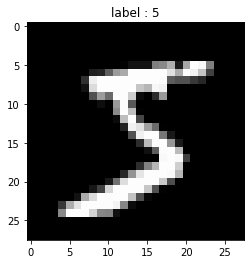

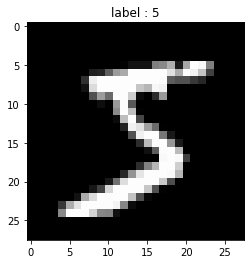

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

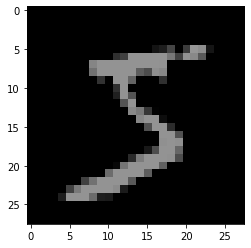

In [126]:
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

plt.imshow(image, 'gray', vmin = 0, vmax = 255)


X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

In [127]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [128]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


【問題1】全結合層のクラス化
全結合層のクラス化を行なってください。


以下に雛形を載せました。コンストラクタで重みやバイアスの初期化をして、あとはフォワードとバックワードのメソッドを用意します。重みW、バイアスB、およびフォワード時の入力Xをインスタンス変数として保持しておくことで、煩雑な入出力は不要になります。


なお、インスタンスも引数として渡すことができます。そのため、初期化方法のインスタンスinitializerをコンストラクタで受け取れば、それにより初期化が行われます。渡すインスタンスを変えれば、初期化方法が変えられます。


また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、すべて全結合層が持つインスタンス変数にすることができます。


初期化方法と最適化手法のクラスについては後述します。




《雛形》


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        pass
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """        
        pass
        return A
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        pass
        # 更新
        self = self.optimizer.update(self)
        return dZ

In [129]:
#【問題8】に記載

【問題2】初期化方法のクラス化
初期化を行うコードをクラス化してください。


前述のように、全結合層のコンストラクタに初期化方法のインスタンスを渡せるようにします。以下の雛形に必要なコードを書き加えていってください。標準偏差の値（sigma）はコンストラクタで受け取るようにすることで、全結合層のクラス内にこの値（sigma）を渡さなくてすむようになります。


これまで扱ってきた初期化方法はSimpleInitializerクラスと名付けることにします。

《雛形》


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W :
        """
        pass
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B :
        """
        pass
        return B

In [130]:
#【問題8】に記載

【問題3】最適化手法のクラス化
最適化手法のクラス化を行なってください。


最適化手法に関しても初期化方法同様に全結合層にインスタンスとして渡します。バックワードのときにself.optimizer.update(self)のように更新できるようにします。以下の雛形に必要なコードを書き加えていってください。


これまで扱ってきた最適化手法はSGDクラス（Stochastic Gradient Descent、確率的勾配降下法）として作成します。

雛形


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """

In [131]:
#【問題8】に記載

【問題4】活性化関数のクラス化
活性化関数のクラス化を行なってください。


ソフトマックス関数のバックプロパゲーションには交差エントロピー誤差の計算も含む実装を行うことで計算が簡略化されます。


発展的要素
活性化関数や重みの初期値、最適化手法に関してこれまで見てきた以外のものを実装していきます。

In [132]:
#【問題8】に記載

【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装してください。


ReLUは以下の数式です。
$$
f(x) = ReLU(x) = \begin{cases}
x  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases}
$$

$x$ : ある特徴量。スカラー


実装上はnp.maximumを使い配列に対してまとめて計算が可能です。


numpy.maximum — NumPy v1.15 Manual


一方、バックプロパゲーションのための $x$ に関する $f(x)$ の微分は以下のようになります。

$$
\frac{\partial f(x)}{\partial x} = \begin{cases}
1  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases}
$$

数学的には微分可能ではないですが、 $x=0$ のとき $0$ とすることで対応しています。


フォワード時の $x$ の正負により、勾配を逆伝播するかどうかが決まるということになります。



In [133]:
#【問題8】に記載

【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、どのような値にすると良いかが知られています。シグモイド関数やハイパボリックタンジェント関数のときは Xavierの初期値 （またはGlorotの初期値）、ReLUのときは Heの初期値 が使われます。


XavierInitializerクラスと、HeInitializerクラスを作成してください。


Xavierの初期値
Xavierの初期値における標準偏差 
σ
 は次の式で求められます。

$$
\sigma = \frac{1}{\sqrt{n}}
$$

n
 : 前の層のノード数


《論文》


Glorot, X., & Bengio, Y. (n.d.). Understanding the difficulty of training deep feedforward neural networks.


Heの初期値
Heの初期値における標準偏差 
σ
 は次の式で求められます。

$$
\sigma = \sqrt{\frac{2}{n}}
$$

n
 : 前の層のノード数


《論文》


He, K., Zhang, X., Ren, S., & Sun, J. (2015). Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification.

In [134]:
#【問題8】に記載

【問題7】最適化手法
学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。


まず、これまで使ってきたSGDを確認します。

$$
W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i}) \\
B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i})
$$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的にはすべて同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


$E()$ : ミニバッチ方向にベクトルの平均を計算


続いて、AdaGradです。バイアスの数式は省略しますが、重みと同様のことをします。


更新された分だけその重みに対する学習率を徐々に下げていきます。イテレーションごとの勾配の二乗和 $H$ を保存しておき、その分だけ学習率を小さくします。


学習率は重み一つひとつに対して異なることになります。

$$
H_i^{\prime}  = H_i+E(\frac{\partial L}{\partial W_i})×E(\frac{\partial L}{\partial W_i})\\
W_i^{\prime} = W_i - \alpha \frac{1}{\sqrt{H_i^{\prime} }} E(\frac{\partial L}{\partial W_i}) \\
$$

$H_i$ : i層目に関して、前のイテレーションまでの勾配の二乗和（初期値は0）


$H_i^{\prime}$ : 更新した $H_i$


《論文》


Duchi JDUCHI, J., & Singer, Y. (2011). Adaptive Subgradient Methods for Online Learning and Stochastic Optimization * Elad Hazan. Journal of Machine Learning Research (Vol. 12).

In [135]:
#【問題8】に記載

【問題8】クラスの完成
任意の構成で学習と推定が行えるScratchDeepNeuralNetrowkClassifierクラスを完成させてください。



In [136]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [137]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([3, 6, 2, 5, 3, 5, 5, 4, 9, 6, 1, 8, 5, 7, 0, 0, 5, 0, 1, 9],
      dtype=uint8))


In [138]:
class functions():
    # 中間層の活性化関数
    # シグモイド関数（ロジスティック関数）
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))

    # ReLU関数
    def relu(self, x):
        return np.maximum(0, x)

    # ステップ関数（閾値0）
    def step_function(self, x):
        return np.where( x > 0, 1, 0) 

    # 出力層の活性化関数
    # ソフトマックス関数
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T

        x = x - np.max(x) # オーバーフロー対策
        return np.exp(x) / np.sum(np.exp(x))

    # ソフトマックスとクロスエントロピーの複合関数
    def softmax_with_loss(self, d, x):
        y = softmax(x)
        return cross_entropy_error(d, y)

    # 誤差関数
    # 最小二乗法
    def least_square(self, d, y):
        return np.sum(np.square(d - y)) / 2

    # クロスエントロピー
    def cross_entropy_error(self, d, y):
        if y.ndim == 1:
            d = d.reshape(1, d.size)
            y = y.reshape(1, y.size)

        # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
        if d.size == y.size:
            d = d.argmax(axis=1)

        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size



    # 活性化関数の導関数
    # シグモイド関数（ロジスティック関数）の導関数
    def d_sigmoid(self, x):
        dx = (1.0 - self.sigmoid(x)) * self.sigmoid(x)
        return dx

    # ReLU関数の導関数
    def d_relu(self, x):
        return np.where( x > 0, 1, 0)

    # ステップ関数の導関数
    def d_step_function(self, x):
        return 0

    # 最小二乗法の導関数
    def d_least_square(d, y):
        return y - d


    # ソフトマックスとクロスエントロピーの複合導関数
    def d_softmax_with_loss(self, d, y):
        batch_size = d.shape[0]
        if d.size == y.size: # 教師データがone-hot-vectorの場合
            dx = (y - d) / batch_size
        else:
            dx = y.copy()
            dx[np.arange(batch_size), d] -= 1
            dx = dx / batch_size
        return dx

    # シグモイドとクロスエントロピーの複合導関数
    def d_sigmoid_with_loss(self, d, y):
        return y - d

    # 数値微分
    def numerical_gradient(self, f, x):
        h = 1e-4
        grad = np.zeros_like(x)

        for idx in range(x.size):
            tmp_val = x[idx]
            # f(x + h)の計算
            x[idx] = tmp_val + h
            fxh1 = f(x)

            # f(x - h)の計算
            x[idx] = tmp_val - h
            fxh2 = f(x)

            grad[idx] = (fxh1 - fxh2) / (2 * h)
            # 値を元に戻す
            x[idx] = tmp_val

        return grad

In [139]:
from sklearn.preprocessing import OneHotEncoder
class ScratchDeepNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, n_features, n_nodes1, n_nodes2, n_output, verbose, activation, initializer, optimizer, epoc, lr, sigma):
        self.batch_size = 20 # バッチサイズ
        self.n_features = n_features # 特徴量の数
        self.n_nodes1 = n_nodes1 # 1層目のノード数
        self.n_nodes2 = n_nodes2 # 2層目のノード数
        self.n_output = n_output # 出力のクラス数（3層目のノード数）
        self.sigma = sigma # ガウス分布の標準偏差
        self.initializer = initializer
        self.SimpleInitializer = SimpleInitializer(initializer=self.initializer, sigma=self.sigma)
        self.network = {}    

        
        if self.initializer == "None":
          self.network['W1'] = self.SimpleInitializer.W(self.n_features, self.n_nodes1)
          self.network['W2'] = self.SimpleInitializer.W(self.n_nodes1, self.n_nodes2)        
          self.network['W3'] = self.SimpleInitializer.W(self.n_nodes2, self.n_output)  
            
        elif  self.initializer == "Xavier":
          self.network['W1'] = self.SimpleInitializer.W(self.n_features, n_nodes1) 
          self.network['W2'] = self.SimpleInitializer.W(self.n_nodes1, self.n_nodes2)
          self.network['W3'] = self.SimpleInitializer.W(self.n_nodes2, self.n_output) 
            
        elif  self.initializer == "He":
          self.network['W1'] = self.SimpleInitializer.W(self.n_features, self.n_nodes1)
          self.network['W2'] = self.SimpleInitializer.W(self.n_nodes1, self.n_nodes2) 
          self.network['W3'] = self.SimpleInitializer.W(self.n_nodes2, self.n_output) 
            

        
        self.network['b1'] = self.SimpleInitializer.B(self.n_nodes1)
        self.network['b2'] = self.SimpleInitializer.B(self.n_nodes2)
        self.network['b3'] = self.SimpleInitializer.B(self.n_output)
        self.verbose = verbose
        self.lr = lr
        self.epoc = epoc
        self.activation = activation
        self.func = functions() 
        self.train_loss_list = []
        self.test_loss_list = []
        self.plot_interval = 100
        self.optimizer = optimizer
        self.h = {}
        self.m = {}
        self.v = {}


        



        print("self.lr = ", self.lr)
        print("self.activation = ", self.activation)
        print("self.optimizer = ", self.optimizer)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        

        print("Learning Start!")
        
        # one-hot-vectol化
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
        y_train_one_hot = enc.fit_transform(y[:, np.newaxis])
        
        if y_val is not None:
            y_test_one_hot = enc.transform(y_val[:, np.newaxis])
        
        # 学習回数のカウンタ
        learning_cnt = 0
        
        for i in range(self.epoc):
            # ミニバッチ取得
            get_mini_batch = GetMiniBatch(X, y_train_one_hot, batch_size = self.batch_size)
            
            # すべてのミニバッチを抜ける前に直前の値をバックアップしておく(グラフ用に)
            bk_mini_y_train = 0
            bk_y_pred = 0
            train_loss_batch = []
            test_loss_batch = []

            #全結合層のインスタンス
            self.FC1 = FC(self.n_features, self.n_nodes1,  self.initializer, self.optimizer,self.sigma, self.n_features, self.n_output,  self.lr, self.network)
            for mini_X_train, mini_y_train in get_mini_batch:
                # このfor文内でミニバッチが使える
                z1, z2, y_pred = self.FC1._forward(self.network, mini_X_train, activation = self.activation)
                grad = self.FC1._backward(learning_cnt, mini_X_train, mini_y_train, z1, z2, y_pred, activation = self.activation, optimizer=self.optimizer, lr=self.lr)
                learning_cnt += 1
                
                # ミニバッチ内のロスを格納
                train_loss_batch.append(self.func.cross_entropy_error(mini_y_train, y_pred))
     

            # loss計算
            # ミニバッチ内のロスの平均を取る
            train_loss_mean = np.array(train_loss_batch).mean()
            # print("【train_loss_mean")
            # print(train_loss_mean)

            self.train_loss_list.append(train_loss_mean)

            # test_loss の初期化
            test_loss = 0
            if X_val is not None:
                z1, z2, y_test_pred = self.FC1._forward(self.network, X_val, activation = self.activation)
                test_loss = self.func.cross_entropy_error(y_test_one_hot, y_test_pred)
                self.test_loss_list.append(test_loss)
                

            if self.verbose:
                #verboseをTrueにした際は学習過程などを出力する
                print("Epoc Count = {}, train_loss = {}, test_loss = {}".format(i+1, train_loss_mean, test_loss))
                
        print("Learning Finish!")

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        z1, z2, y_pred = self.FC1._forward(self, X)

        y_pred = np.argmax(y_pred, axis = 1)
        return y_pred
    
 
class FC:
  """
  ノード数n_nodes1からn_nodes2への全結合層
  Parameters
  ----------
  n_nodes1 : int
    前の層のノード数
  n_nodes2 : int
    後の層のノード数
  initializer : 初期化方法のインスタンス
  optimizer : 最適化手法のインスタンス
  """
  def __init__(self, n_nodes1, n_nodes2, initializer, optimizer, sigma,n_features,n_output,lr,network):
      self.optimizer = optimizer
      self.initializer = initializer
      self.sigma = sigma
      self.func = functions() 
      self.lr = lr
      self.network=network
      
   # 順伝播
  def _forward(self, network, x, activation ="sigmoid" ):
      """
      フォワード
      Parameters
      ----------
      X : 次の形のndarray, shape (batch_size, n_nodes1)
          入力
      Returns
      ----------
      A : 次の形のndarray, shape (batch_size, n_nodes2)
          出力
      """        
      W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
      b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']

      if activation == "sigmoid":
          # 第１層への入力
          A1 =  np.dot(x, W1) + b1
          # 第１層の出力（第１層の入力を活性化関数に通す）
          Z1 = self.func.sigmoid(A1)
          
          # 第２層への入力
          A2 =  np.dot(Z1, W2) + b2
          # 第２層の出力（第２層の入力を活性化関数に通す）
          Z2 = self.func.sigmoid(A2) 

      elif activation == "tanh":
          # 第１層への入力
          A1 =  np.dot(x, W1) + b1
          # 第１層の出力（第１層の入力を活性化関数に通す）
          Z1 = np.tanh(A1)

          # 第２層への入力
          A2 =  np.dot(Z1, W2) + b2
          # 第２層の出力（第２層の入力を活性化関数に通す）
          Z2 = np.tanh(A2)  

      elif activation == "relu" :
          # 第１層への入力
          A1 =  np.dot(x, W1) + b1
          # 第１層の出力（第１層の入力を活性化関数に通す）
          Z1 = self.func.relu(A1)

          # 第２層への入力
          A2 =  np.dot(Z1, W2) + b2
          # 第２層の出力（第２層の入力を活性化関数に通す）
          Z2 = self.func.relu(A2)   

      # 第３層への入力
      A3 =  np.dot(Z2, W3) + b3
      # 出力層への出力
      y_pred = self.func.softmax(A3)
      return   Z1, Z2, y_pred


  def _backward(self, i, x, y, z1, z2, y_pred, activation,optimizer ,lr):
      """
      バックワード
      Parameters
      ----------
      dA : 次の形のndarray, shape (batch_size, n_nodes2)
          後ろから流れてきた勾配
      Returns
      ----------
      dZ : 次の形のndarray, shape (batch_size, n_nodes1)
          前に流す勾配
      """
  
      grad = {}

      W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
      b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']   

      # 出力層でのデルタ
      delta3 = self.func.d_softmax_with_loss(y, y_pred)

      if activation == "sigmoid":
          # b3の勾配
          grad['b3'] = np.sum(delta3, axis=0)

          # W3の勾配
          grad['W3'] = np.dot(z2.T, delta3)

          # 2層でのデルタ
          delta2 = np.dot(delta3, W3.T) * self.func.d_sigmoid(z2)

          # b2の勾配
          grad['b2'] = np.sum(delta2, axis=0)

          # W2の勾配
          grad['W2'] = np.dot(z1.T, delta2)

          # 1層でのデルタ
          delta1 = np.dot(delta2, W2.T) * self.func.d_sigmoid(z1)

          # b1の勾配
          grad['b1'] = np.sum(delta1, axis=0)

          # W1の勾配
          grad['W1'] = np.dot(x.T, delta1)

          
      elif activation == "relu":
          # b3の勾配
          grad['b3'] = np.sum(delta3, axis=0)

          # W3の勾配
          grad['W3'] = np.dot(z2.T, delta3)
          
          # 2層でのデルタ
          delta2 = np.dot(delta3, W3.T) * self.func.d_relu(z2)
          
          # b2の勾配
          grad['b2'] = np.sum(delta2, axis=0)

          # W2の勾配
          grad['W2'] = np.dot(z1.T, delta2)

          # 1層でのデルタ
          delta1 = np.dot(delta2, W2.T) * self.func.d_relu(z1)

          # b1の勾配
          grad['b1'] = np.sum(delta1, axis=0)

          # W1の勾配
          grad['W1'] = np.dot(x.T, delta1)
          # 更新
          # self = self.optimizer.update(self)
        # =========================================================
      # パラメータに勾配適用
      if self.optimizer == "AdaGrad":
      # AdaGrad =====================================================
          # if i == 0:
              # self.h = {}
          for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
              if i == 0:
                  self.h[key] = np.zeros_like(self.network[key])
              self.h[key] += np.square(grad[key])
              self.network[key] -= self.lr * grad[key] / (np.sqrt(self.h[key]) + 1e-7)  
              
      # =========================================================
      # パラメータに勾配適用
      elif self.optimizer == "Adam":
      # Adam ====================================================
          # print("i = ", i)
          beta1 = 0.9
          beta2 = 0.999 
          # if i == 0:
              # self.m = {}
              # self.v = {}
          learning_rate_t  = self.lr * np.sqrt(1.0 - beta2 ** (i + 1)) / (1.0 - beta1 ** (i + 1))    
          for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
              if i == 0:
                  self.m[key] = np.zeros_like(self.network[key])
                  self.v[key] = np.zeros_like(self.network[key])

              self.m[key] += (1 - beta1) * (grad[key] - self.m[key])
              self.v[key] += (1 - beta2) * (grad[key] ** 2 - self.v[key])            
              self.network[key] -= learning_rate_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)   
      else:
          # その他はすべてSGDにする
          # SGD =====================================================

          for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
              # self.network[key]  -= self.lr * grad[key]
              self.network[key]  -= self.lr * grad[key]                     
      return grad





class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma,initializer):
        self.sigma = sigma
        self.initializer = initializer
    def W(self, n_nodes1, n_nodes2):
      """
      重みの初期化
      Parameters
      ----------
      n_nodes1 : int
        前の層のノード数
      n_nodes2 : int
        後の層のノード数
      Returns
      ----------
      W :
      """
      if self.initializer == "None":
          W = self.sigma * np.random.randn(n_nodes1, n_nodes2)#n_nodes1と n_nodes2の前にself.は要らない（野田講師に指摘された）        
      elif  self.initializer == "Xavier":
          W = np.random.rand(n_nodes1, n_nodes2) / np.sqrt(n_nodes1) #n_nodes1と n_nodes2の前にself.は要らない（野田講師に指摘された）
      elif  self.initializer == "He":
          W = np.random.rand(n_nodes1, n_nodes2) / np.sqrt(n_nodes1) * np.sqrt(2) #n_nodes1と n_nodes2の前にself.は要らない（野田講師に指摘された）
      else:
        pass
      return W

    def B(self, n_nodes2):
      """
      バイアスの初期化
      Parameters
      ----------
      n_nodes2 : int
        後の層のノード数
      Returns
      ----------
      B :
      """
      B = np.zeros(n_nodes2)
      return B


class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        for key in range(steps):
          #parameter = parameter - lr * grad
          self.layer = self.layer - self.lr * grad[key] 
        return self.layer
      
# self.network[key]  -= self.lr * grad[key] 


class AdaGrad:
  """
  確率的勾配降下法
  パラメータが最適値までまだまだ遠い時（学習初期）は
  大きくパラメータを更新したいが、パラメータが最適値に
  近づいた時（学習終盤）は最適値を通り過ぎないように
  パラメータの更新量を小さくしたい。という考えで学習が
  進むほど学習率を小さくしていくテクニックがあります。
  デフォルトパラメータ lr = 0.01
  epsilon = 0.0000001　0で割ることにならないために微小値を分母に足しています
  ちなみにAdaGradは、adaptive gradient algorithmの略です。直訳すると、「適応性のある勾配アルゴリズム」となります。
  Parameters
  ----------
  lr : 学習率
  """
  def __init__(self, lr):
      self.lr = lr
  def update(self, layer):
      """
      ある層の重みやバイアスの更新
      Parameters
      ----------
      layer : 更新前の層のインスタンス
      """
      h=0 #gradと同じサイズの行列
      for key in range(steps):
        h = h + grad[key] * grad[key]
        layer = layer - lr * grad[key] / (sqrt(h) + epsilon)
      return parameter





In [140]:
ScratchMNIST = ScratchDeepNeuralNetrowkClassifier(n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, verbose = True, activation = "sigmoid", initializer = "None", optimizer = "SGD", epoc = 5, lr = 0.08, sigma = 0.05)
#def __init__(self, verbose, activation, initializer, optimizer, epoc, lr, sigma):

self.lr =  0.08
self.activation =  sigmoid
self.optimizer =  SGD


In [141]:
ScratchMNIST.fit(X_train, y_train, X_test, y_test)

Learning Start!
Epoc Count = 1, train_loss = 0.9684677595302241, test_loss = 0.3915344640856662
Epoc Count = 2, train_loss = 0.3572680581616954, test_loss = 0.3070397689009036
Epoc Count = 3, train_loss = 0.3062355706763598, test_loss = 0.2785436374453534
Epoc Count = 4, train_loss = 0.28100271842182983, test_loss = 0.26357377772008705
Epoc Count = 5, train_loss = 0.2658121840162057, test_loss = 0.2545205872230432
Learning Finish!


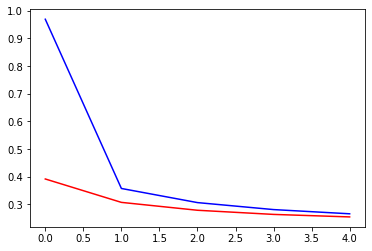

In [142]:
plt.plot(range(len(ScratchMNIST.train_loss_list)), ScratchMNIST.train_loss_list, color = "blue")
plt.plot(range(len(ScratchMNIST.test_loss_list)), ScratchMNIST.test_loss_list, color = "red")

【問題9】学習と推定
層の数や活性化関数を変えたいくつかのネットワークを作成してください。そして、MNISTのデータを学習・推定し、Accuracyを計算してください。

推定 層の数を以下に変更

self.n_nodes1 = 300 # 1層目のノード数

self.n_nodes2 = 100 # 2層目のノード数

In [143]:
ScratchMNIST2 = ScratchDeepNeuralNetrowkClassifier(n_features=784, n_nodes1=300, n_nodes2=100, n_output=10, verbose = True, activation = "sigmoid", initializer = "None", optimizer = "SGD", epoc = 5, lr = 0.08, sigma = 0.05)
ScratchMNIST2.fit(X_train, y_train, X_test, y_test)

self.lr =  0.08
self.activation =  sigmoid
self.optimizer =  SGD
Learning Start!
Epoc Count = 1, train_loss = 1.1308687762574976, test_loss = 0.44059151893851634
Epoc Count = 2, train_loss = 0.38521448930290686, test_loss = 0.3263579914680063
Epoc Count = 3, train_loss = 0.3220396131976056, test_loss = 0.2910731232290143
Epoc Count = 4, train_loss = 0.2916080076676652, test_loss = 0.2722093329431349
Epoc Count = 5, train_loss = 0.2728297077022495, test_loss = 0.2618478160870756
Learning Finish!


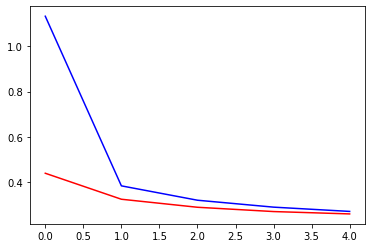

In [144]:
plt.plot(range(len(ScratchMNIST2.train_loss_list)), ScratchMNIST2.train_loss_list, color = "blue")
plt.plot(range(len(ScratchMNIST2.test_loss_list)), ScratchMNIST2.test_loss_list, color = "red")

In [145]:
y_pred_ScratchMNIST2 = ScratchMNIST2.predict(X_test)
y_pred_ScratchMNIST2

array([7, 2, 1, ..., 4, 5, 6])

In [147]:
import pandas as pd
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_ScratchMNIST2, output_dict=True)

# pandas.DataFrameへ変換
df_cr = pd.DataFrame(cr)
df_cr

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.936523,0.966725,0.939175,0.927007,0.921212,0.879059,0.937759,0.936337,0.868474,0.898175,0.922,0.921045,0.922236
recall,0.978571,0.972687,0.882752,0.880198,0.928717,0.880045,0.943633,0.929961,0.888090,0.926660,0.922,0.921131,0.922000
f1-score,0.957086,0.969697,0.910090,0.902996,0.924949,0.879552,0.940687,0.933138,0.878173,0.912195,0.922,0.920856,0.921884
support,980.000000,1135.000000,1032.000000,1010.000000,982.000000,892.000000,958.000000,1028.000000,974.000000,1009.000000,0.922,10000.000000,10000.000000


Accuracy 92.2%

活性化関数をreluに変更

In [154]:
ScratchMNIST_relu = ScratchDeepNeuralNetrowkClassifier(n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, verbose = True, activation = "relu", initializer = "None", optimizer = "SGD", epoc = 5, lr = 0.08, sigma = 0.05)
ScratchMNIST_relu.fit(X_train, y_train, X_test, y_test)

self.lr =  0.08
self.activation =  relu
self.optimizer =  SGD
Learning Start!
Epoc Count = 1, train_loss = 0.2889240398948352, test_loss = 0.13752481967153998
Epoc Count = 2, train_loss = 0.11154580064896673, test_loss = 0.09462351963261169
Epoc Count = 3, train_loss = 0.07022463855702488, test_loss = 0.07737094237025377
Epoc Count = 4, train_loss = 0.04636324756425083, test_loss = 0.0718199813777921
Epoc Count = 5, train_loss = 0.030568666024245288, test_loss = 0.07484878304346862
Learning Finish!


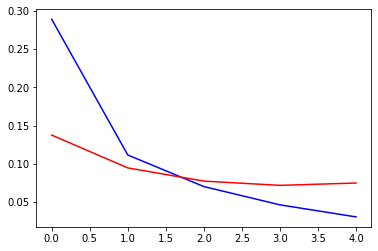

In [155]:
plt.plot(range(len(ScratchMNIST_relu.train_loss_list)), ScratchMNIST_relu.train_loss_list, color = "blue")
plt.plot(range(len(ScratchMNIST_relu.test_loss_list)), ScratchMNIST_relu.test_loss_list, color = "red")

In [156]:
y_pred_ScratchMNIST_relu  = ScratchMNIST_relu.predict(X_test)
y_pred_ScratchMNIST_relu 

array([7, 5, 7, ..., 7, 5, 7])

In [157]:
import pandas as pd
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_ScratchMNIST_relu, output_dict=True)

# pandas.DataFrameへ変換
df_cr = pd.DataFrame(cr)
df_cr

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.930502,0.822894,0.0,0.431730,0.0,0.137470,1.000000,0.0,0.2558,0.432260,0.442682
recall,0.0,0.000881,0.467054,0.377228,0.0,0.744395,0.0,1.000000,0.002053,0.0,0.2558,0.259161,0.255800
f1-score,0.0,0.001761,0.621935,0.517312,0.0,0.546502,0.0,0.241712,0.004098,0.0,0.2558,0.193332,0.190627
support,980.0,1135.000000,1032.000000,1010.000000,982.0,892.000000,958.0,1028.000000,974.000000,1009.0,0.2558,10000.000000,10000.000000


Accuracy 25.6%